[View in Colaboratory](https://colab.research.google.com/github/ajoshiusc/brainsync/blob/master/deep_rr.ipynb)

------------------------------
Loading and preprocessing train data...
------------------------------
Creating and compiling model...
Fitting Model
Train on 819 samples, validate on 205 samples
Epoch 1/20
819/819 [==============================] - 5s 7ms/step - loss: 2748.2651 - mean_squared_error: 2748.2651 - val_loss: 1349.1003 - val_mean_squared_error: 1349.1003
Epoch 2/20
819/819 [==============================] - 4s 4ms/step - loss: 749.1474 - mean_squared_error: 749.1474 - val_loss: 231.1643 - val_mean_squared_error: 231.1643
Epoch 3/20
819/819 [==============================] - 4s 4ms/step - loss: 352.0145 - mean_squared_error: 352.0145 - val_loss: 320.2419 - val_mean_squared_error: 320.2419
Epoch 4/20
819/819 [==============================] - 4s 4ms/step - loss: 175.7012 - mean_squared_error: 175.7012 - val_loss: 103.0048 - val_mean_squared_error: 103.0048
Epoch 5/20
819/819 [==============================] - 4s 4ms/step - loss: 74.8870 - mean_squared_error: 74.8870 - val_loss

819/819 [==============================] - 4s 4ms/step - loss: 43.7889 - mean_squared_error: 43.7889 - val_loss: 43.3292 - val_mean_squared_error: 43.3292
Epoch 7/20
819/819 [==============================] - 4s 4ms/step - loss: 29.3999 - mean_squared_error: 29.3999 - val_loss: 25.4274 - val_mean_squared_error: 25.4274
Epoch 8/20
819/819 [==============================] - 4s 4ms/step - loss: 20.1641 - mean_squared_error: 20.1641 - val_loss: 24.1726 - val_mean_squared_error: 24.1726
Epoch 9/20
819/819 [==============================] - 4s 4ms/step - loss: 22.5837 - mean_squared_error: 22.5837 - val_loss: 16.4948 - val_mean_squared_error: 16.4948
Epoch 10/20
819/819 [==============================] - 4s 4ms/step - loss: 29.5045 - mean_squared_error: 29.5045 - val_loss: 33.2733 - val_mean_squared_error: 33.2733
Epoch 11/20
819/819 [==============================] - 4s 4ms/step - loss: 19.7678 - mean_squared_error: 19.7678 - val_loss: 11.6759 - val_mean_squared_error: 11.6759
Epoch 12/20
5

819/819 [==============================] - 4s 4ms/step - loss: 21.1235 - mean_squared_error: 21.1235 - val_loss: 16.0959 - val_mean_squared_error: 16.0959
Epoch 13/20
819/819 [==============================] - 4s 4ms/step - loss: 16.3060 - mean_squared_error: 16.3060 - val_loss: 8.2377 - val_mean_squared_error: 8.2377
Epoch 14/20
819/819 [==============================] - 4s 4ms/step - loss: 12.0117 - mean_squared_error: 12.0117 - val_loss: 5.9538 - val_mean_squared_error: 5.9538
Epoch 15/20
819/819 [==============================] - 4s 4ms/step - loss: 6.5295 - mean_squared_error: 6.5295 - val_loss: 5.2256 - val_mean_squared_error: 5.2256
Epoch 16/20
819/819 [==============================] - 4s 4ms/step - loss: 8.3581 - mean_squared_error: 8.3581 - val_loss: 7.2552 - val_mean_squared_error: 7.2552
Epoch 17/20
819/819 [==============================] - 4s 4ms/step - loss: 5.4160 - mean_squared_error: 5.4160 - val_loss: 7.8681 - val_mean_squared_error: 7.8681
Epoch 18/20
576/819 [=====

819/819 [==============================] - 4s 4ms/step - loss: 6.5603 - mean_squared_error: 6.5603 - val_loss: 6.4068 - val_mean_squared_error: 6.4068
Epoch 19/20
819/819 [==============================] - 4s 4ms/step - loss: 7.8835 - mean_squared_error: 7.8835 - val_loss: 7.4500 - val_mean_squared_error: 7.4500
Epoch 20/20
819/819 [==============================] - 4s 4ms/step - loss: 4.9976 - mean_squared_error: 4.9976 - val_loss: 3.4344 - val_mean_squared_error: 3.4344
dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


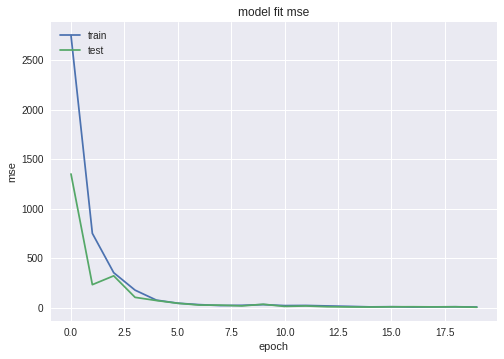

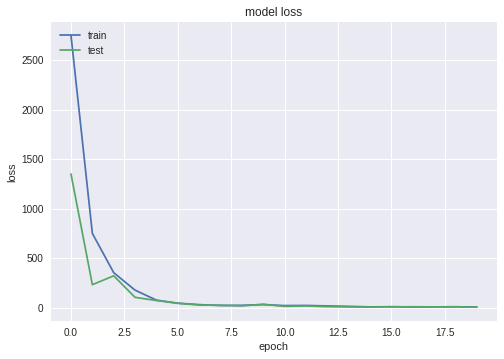

Test data...


In [13]:
#AUM
#Shree Ganeshaya Namaha

from skimage.transform import resize, rotate
from skimage.color import rgb2gray
from skimage.io import imread
from keras.layers import Input,Conv2D,concatenate,MaxPooling2D,Flatten,Dense
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt

K.set_image_data_format('channels_last')  # TF dimension ordering in this code

from keras import losses
img_rows = 128
img_cols = 128

from google.colab import files
uploaded = files.upload()






def get_rr_net():
    inputs = Input((img_rows, img_cols, 2))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    flat1 = Flatten()(conv5)
    out_theta = Dense(1)(flat1)
#    conv_tx = Conv2D(1, (1, 1), activation=final_activation)(conv5)
#    conv_ty = Conv2D(1, (1, 1), activation=final_activation)(conv5)
#    conv_theta = Conv2D(1, (1, 1), activation='tanh')(conv5)

#    out_img = rotate(inputs,conv_theta)

    model = Model(inputs=[inputs], outputs=out_theta)

    model.compile(optimizer='adam', loss=losses.mean_squared_error, metrics=['mse'])

    return model


def gen_train_data(img, N=1024):
    imgs_train = np.zeros((N, img.shape[0], img.shape[1], 2))
    out_train = uniform(low=-90, high=90, size=(N,1))
    in_rot = uniform(low=-90, high=90, size=(N,1))

    for j in range(N):
        img2 = rotate(img, in_rot[j])
        img2 -= np.mean(img2)
        img2 /= np.std(img2)
        imgs_train[j, :, :, 0] = img2
        img3 = 10-1*np.tanh(rotate(img2, out_train[j]))
        img3 -= np.mean(img3)
        img3 /= np.std(img3)
        imgs_train[j, :, :, 1] = img3

    return imgs_train, out_train


def train_and_predict():
    print('-'*30)
    print('Loading and preprocessing train data...')
    print('-'*30)
    img = resize(rgb2gray(imread('sample_brain.png')).astype('float32'),(img_rows,img_cols),mode='constant')
    mean = np.mean(img)  # mean for data centering
    std = np.std(img)  # std for data normalization

    img -= mean
    img /= std

    imgs_train, out_train = gen_train_data(img, 1024)

    print('Creating and compiling model...')
    rrmodel = get_rr_net()
    model_checkpoint = ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True)

    print('Fitting Model')
    history = rrmodel.fit(imgs_train, out_train, batch_size=32, epochs=20, verbose=1,
                shuffle=True, validation_split=0.2,
                callbacks=[model_checkpoint])
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('model fit mse')
    plt.ylabel('mse')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    print('Test data...')
    

if __name__ == '__main__':
    train_and_predict()
